## Les coefficients pour la comparaison des aires d'alimentation

Ce notebook relate les coefficients pour la comparaison des résultats des aires d'alimentation. Chacun de ces coefficients sont discutés dans les paragraphes suivants. On retrouve :

<ul>
    <li>Le nombre de noeuds $\tau$</li>
    <li>La surface d'une zone Zu $A_{zu}$</li>
    <li>Le coefficient d'efficacité $\eta$</li>
</ul>

### $\tau$ : Le nombre de noeuds d'une aire d'alimentation

Dans le programme informatique ZuPer, la discrétisation numérique du bassin d'alimentation pour calculer une zone Zu est constitué de noeuds et d'éléments. Ceci est aussi utilisé pour représenter le maillage du bassin d'alimentation dans le logiciel Feflow. Pour définir une aire d'alimentation selon les méthodes du programme ZuPer, il faut pouvoir compter le nombre de noeuds représentant les parties du bassin d'alimentation qui sont à définir pour reconstituer la zone Zu.

Pour compter le nombre de noeuds, on utilise la fonction indicatrice traduisant quel noeud du maillage est nécessaire à être stocker selon les conditions définies par la méthode de délimitation.

Ce nombre de noeuds spécifique à l'aire d'alimentation discrétisé est noté $\tau$ et sera utilisé plus tard pour un autre coefficient.

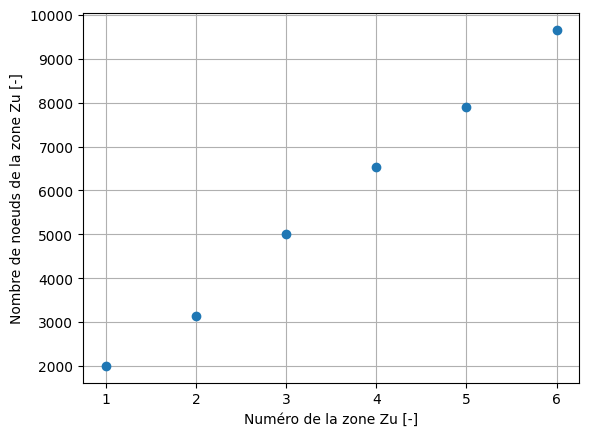

In [6]:
import numpy as np
import matplotlib.pyplot as plt

tau = [2005, 3135, 5000, 6523, 7894, 9655]

plt.figure()
plt.plot(range(1,len(tau)+1), tau, 'o')
plt.grid()
plt.xlabel("Numéro de la zone Zu [-]")
plt.ylabel("Nombre de noeuds de la zone Zu [-]")
plt.show()

### $A_{zu}$ : La surface d'une aire d'alimentation

Le coefficient de la surface d'une aire d'alimentation est défini à partir du nombre de noeuds ($\tau$) auquel on le multiplie par la surface d'une cellule du maillage ($s$). Cette opération permet de définir la surface totale de l'aire d'alimentation noté $A_{zu}$ et on la note ainsi :

<br><center>$A_{zu} = \tau s$</center></br>

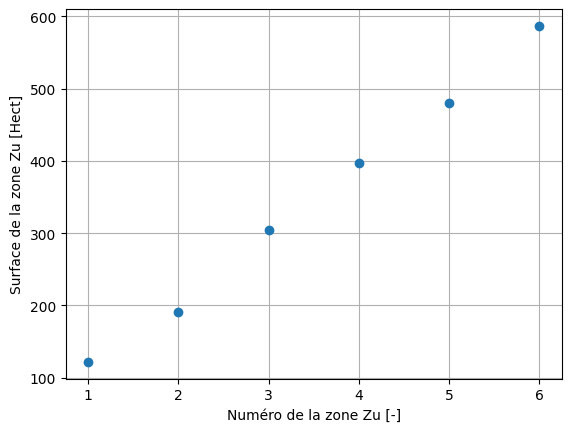

In [7]:
dx, dy = 24.5, 24.8
s = dx*dy
a_zu = [i * s/10000 for i in tau]

plt.figure()
plt.plot(range(1,len(a_zu)+1), a_zu, 'o')
plt.grid()
plt.xlabel("Numéro de la zone Zu [-]")
plt.ylabel("Surface de la zone Zu [Hect]")
plt.show()

### $\eta$ : Le coefficient d'efficacité

Le coefficient d'efficacité est un des nouveau coefficient permettant de définir la capacité à diminuer la concentration massique d'un polluant, calculé avec le logiciel Feflow. Ce calcul se base sur la résolution de l'équation de transport de masse (). Cette équation permet de définir la variation de la concentration d'un corps soluble dans l'eau. C'est alors une condition limite de concentration imposée (ordre 1) de valeur 0 en amont du maillage.

Pour définir ce nouveau coefficient, il faut résoudre l'équation de transport de masse deux fois. Le premier cas correspond à une variation de la concentration dans tout le maillage du modèle numérique avec une concentration d'un corps extérieur sur tout les noeuds du modèle. La concentration au niveau du puits est stocké dans une variable que l'on note $c_{r}$.

Ensuite, on refait une résolution de l'équation de transport de masse en appliquant une condition permettant de considérer une nouvelle concentration massique à la position du puits, noté $c_{m}$.

Pour calculer le coefficient d'efficacité, on utilise la formule suivante :

<br><center>$\eta = \frac{c_{r} - c_{m}}{c_{r}} = 1 - \frac{c_{m}}{c_{r}}$</center></br>

Pour que le résultat soit plus simple à interpréter, nous multiplirons $\eta$ par 100%, donnant alors une échelle de valeur allant de 0% à 100%.

In [13]:
cr = [40.15, 38.12, 35.98, 33.70, 30.45, 30.00]
cm = [10.25, 30.15, 5.65, 27.81, 12.74, 20.12]

eta = [(cr[i] - cm[i])/cr[i] *100 for i in range(len(cr))]

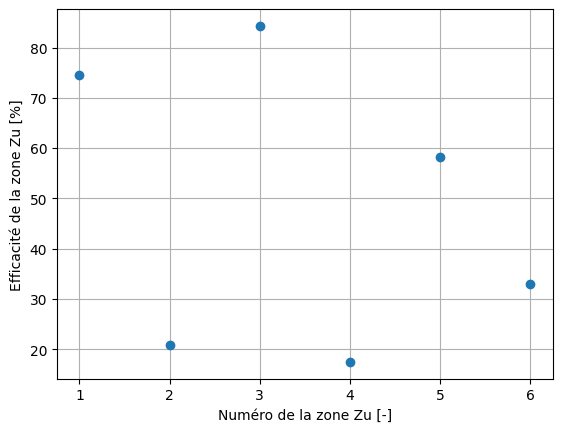

In [14]:
plt.figure()
plt.plot(range(1,len(eta)+1), eta, 'o')
plt.grid()
plt.xlabel("Numéro de la zone Zu [-]")
plt.ylabel("Efficacité de la zone Zu [%]")
plt.show()

### Graphe de Pareto

Le graphe de Pareto est une représentation visuel des données obtenues après les calculs de tous les coefficients pour chaque zone Zu choisie. Elle reprend le concept d'optimum de Pareto, signifiant de trouver un compromis entre deux variables complètement différente l'une de l'autre. Pour trouver quel couple de données est le meilleur et quelle zone Zu est la plus efficace, il faut trouver :

<ul>
    <li>La plus petite surface possible</li>
    <li>Le plus grand coefficient d'efficacité</li>
</ul>

C'est pour cela que l'axe des ordonnées est inversée pour appliquer cette conditions pour pouvoir comparer les résultats.

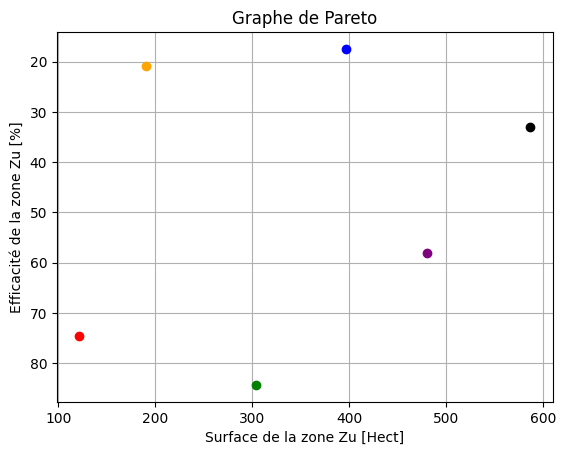

In [22]:
cmap = ['red', 'orange', 'green', 'blue', 'purple', 'black']
plt.figure()
for i in range(len(cmap)):
    plt.plot(a_zu[i], eta[i], 'o', color=cmap[i])
    
plt.grid()
plt.xlabel("Surface de la zone Zu [Hect]")
plt.ylabel("Efficacité de la zone Zu [%]")
plt.gca().invert_yaxis()
plt.title("Graphe de Pareto")
plt.show()